### Nsynth Experiments
#### Part 1 : Modifying encodings
(This notebook is maintained as experiments towards Master thesis research by Manaswi Mishra at MTG, UPF.)

In this notebook, I perform experiments with modifying the nsynth encodings of an audio file. The following modifications are tested in the various sections that follow.

> - Time stretching and compression
> - Reversing
> - Flipping the signs of the encoding
> - Amplitude scaling of the encoding
> - Muting each channel
> - Suppressing and Enhancing each channel by a factor
> - Enveloping

In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

### Environment Setup

In [2]:
# Install magenta
print('Installing Magenta...\n')
!pip install -q magenta


# NOTE : gsutil not working in python 3.6. Loading model checkpoint from local drive currently. Uncomment below when fixed.
'''
print('Installing gsutil...\n')
!pip install -q gsutil

print('Downloading Pretrained Models...\n')
# Copy checkpoints from google cloud
# Copying 1GB, takes a minute
print('Getting Instruments Model...\n')
!gsutil -q -m cp -R gs://download.magenta.tensorflow.org/models/nsynth/wavenet-ckpt.tar /content/
print('Getting Voices Model...\n')
!gsutil -q -m cp -R gs://download.magenta.tensorflow.org/models/nsynth/wavenet-voice-ckpt.tar.gz /content/
!cd /content/
!tar -xvf wavenet-ckpt.tar > /dev/null
!tar -xvf wavenet-voice-ckpt.tar.gz > /dev/null
'''


print('Importing Modules...\n')
# Load modules and helper functions
import os
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
%matplotlib inline

from magenta.models.nsynth import utils
from magenta.models.nsynth.wavenet import fastgen

get_name = lambda f: os.path.splitext(os.path.basename(f))[0]
output_path = './output/ModifyingEncoding/'

print('Sucess!! Environment is now setup.')

Installing Magenta...

Importing Modules...

Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Sucess!! Environment is now setup.


In [3]:
# Importing model checkpoints from local drive /model/

Model = "Instruments"
ckpt = {'Instruments':'./model/wavenet-ckpt/model.ckpt-200000',
       'Voices':'./model/wavenet-voice-ckpt/model.ckpt-200000'}

ckpt_path = ckpt[Model]
print('Using model pretrained on %s.' % Model)

Using model pretrained on Instruments.


### Loading Audio
Choose an audio file (only upto 2 seconds is selected, because of the expensive computation of synthesizing from encoding)
> About 4 minutes per second of audio batch to synthesize on a GPU

In [4]:
audio_file = './sounds/243851__zuluonedrop__dm-150-f-sax-riff.wav'
name_list = [get_name(audio_file)]
audio_list = []

Length = 2.0
SR = 16000
SAMPLE_LENGTH = int(Length * SR)

audio = utils.load_audio(audio_file, sample_length = SAMPLE_LENGTH, sr = SR)
audio_list.append(audio)

for i in range(len(audio_list)):
    audio_list[i] = audio_list[i] / np.abs(audio_list[i]).max()

    if len(audio_list[i]) < SAMPLE_LENGTH:
        padding = SAMPLE_LENGTH - len(audio_list[i])
        audio_list[i] = np.pad(audio_list[i], (0, padding), 'constant')

ipd.Audio(audio, rate = SR)

### Generate Encodings

In [5]:
audio = np.array(audio_list)
z = fastgen.encode(audio, ckpt_path, SAMPLE_LENGTH)
print('Encoded %d files' % z.shape[0])

INFO:tensorflow:Restoring parameters from ./model/wavenet-ckpt/model.ckpt-200000
Encoded 1 files


Text(0.5,1,'NSynth Encoding')

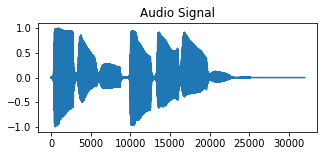

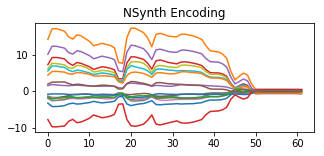

In [6]:
plt.figure(figsize=(5, 2))
plt.plot(audio[0])
plt.title('Audio Signal')

plt.figure(figsize=(5, 2))
plt.plot(z[0])
plt.title('NSynth Encoding')

### Resynthesizing from embedding
We resynthesize once from original embedding before performing manipulations, in order to generate a basic synthesis and observe the biases and compression built into the nsynth encoding.  
  
 NOTE : This step takes about 4 mins per second of audio batch on a GPU! Its time to be patient.

In [7]:
print('Total Iterations to Complete: %d\n' % SAMPLE_LENGTH)

z_list = [z_ for z_ in z]
encodings = np.array(z_list)
save_paths = [output_path + name + '.wav' for name in name_list]

Total Iterations to Complete: 32000



In [8]:
# Uncomment for Synthesizing. Run on GPU enabled system

fastgen.synthesize(encodings,
                   save_paths=save_paths,
                   checkpoint_path=ckpt_path,
                   samples_per_save=int(SAMPLE_LENGTH / 10))


INFO:tensorflow:Restoring parameters from ./model/wavenet-ckpt/model.ckpt-200000
INFO:tensorflow:Sample: 0
INFO:tensorflow:Saving: ./output/ModifyingEncoding/243851__zuluonedrop__dm-150-f-sax-riff.wav
INFO:tensorflow:Sample: 100
INFO:tensorflow:Sample: 200
INFO:tensorflow:Sample: 300
INFO:tensorflow:Sample: 400
INFO:tensorflow:Sample: 500
INFO:tensorflow:Sample: 600
INFO:tensorflow:Sample: 700
INFO:tensorflow:Sample: 800
INFO:tensorflow:Sample: 900
INFO:tensorflow:Sample: 1000
INFO:tensorflow:Sample: 1100
INFO:tensorflow:Sample: 1200
INFO:tensorflow:Sample: 1300
INFO:tensorflow:Sample: 1400
INFO:tensorflow:Sample: 1500
INFO:tensorflow:Sample: 1600
INFO:tensorflow:Sample: 1700
INFO:tensorflow:Sample: 1800
INFO:tensorflow:Sample: 1900
INFO:tensorflow:Sample: 2000
INFO:tensorflow:Sample: 2100
INFO:tensorflow:Sample: 2200
INFO:tensorflow:Sample: 2300
INFO:tensorflow:Sample: 2400
INFO:tensorflow:Sample: 2500
INFO:tensorflow:Sample: 2600
INFO:tensorflow:Sample: 2700
INFO:tensorflow:Sample: 2

INFO:tensorflow:Sample: 25000
INFO:tensorflow:Sample: 25100
INFO:tensorflow:Sample: 25200
INFO:tensorflow:Sample: 25300
INFO:tensorflow:Sample: 25400
INFO:tensorflow:Sample: 25500
INFO:tensorflow:Sample: 25600
INFO:tensorflow:Saving: ./output/ModifyingEncoding/243851__zuluonedrop__dm-150-f-sax-riff.wav
INFO:tensorflow:Sample: 25700
INFO:tensorflow:Sample: 25800
INFO:tensorflow:Sample: 25900
INFO:tensorflow:Sample: 26000
INFO:tensorflow:Sample: 26100
INFO:tensorflow:Sample: 26200
INFO:tensorflow:Sample: 26300
INFO:tensorflow:Sample: 26400
INFO:tensorflow:Sample: 26500
INFO:tensorflow:Sample: 26600
INFO:tensorflow:Sample: 26700
INFO:tensorflow:Sample: 26800
INFO:tensorflow:Sample: 26900
INFO:tensorflow:Sample: 27000
INFO:tensorflow:Sample: 27100
INFO:tensorflow:Sample: 27200
INFO:tensorflow:Sample: 27300
INFO:tensorflow:Sample: 27400
INFO:tensorflow:Sample: 27500
INFO:tensorflow:Sample: 27600
INFO:tensorflow:Sample: 27700
INFO:tensorflow:Sample: 27800
INFO:tensorflow:Sample: 27900
INFO:t

Lets take a listen to the basic encode - decode pipeline. Because of the high level of compression in the encoding the sound becomes very gritty. But it follows the temporal structure and has an identifiable pitch that it reproduces.  

In [9]:
encoding_path_list = save_paths
audio = utils.load_audio(encoding_path_list[0], sr = SR)
#output_audio_list = utils.load_audio('357902__mtg__cello-c2.wav', sr = SR)

ipd.Audio(audio, rate = SR)

NOTE : In the funk guitar example (331365__orangefreesounds__funk-guitar-loop-114-bpm.wav) you can notice that the resynthesized audio begins at a lower pitch and quickly adjusts to the correct melody line of the original. 

## Manipulations : It's time to create new weird sounds
All modified sounds are stored in an encoding_list, to be synthesized in batches. 

In [10]:
encoding_list = [encodings_i for encodings_i in encodings]
encoding_name_list = [get_name(fname) + '.wav' for fname in encoding_path_list]
fname = encoding_name_list[0]
print(fname, '\n is the file being manipulated.')

243851__zuluonedrop__dm-150-f-sax-riff.wav 
 is the file being manipulated.


#### 1) Time Stretching and Compression

In [11]:
# Using image interpolation to make manipulations to the encoding
try:
    from skimage.transform import resize
except ImportError:
    !pip install scikit-image
    from skimage.transform import resize

# Normalized for resize operation and then brought back into the range of the encoding
def  timestretch (encodings, factor):
    min_encoding, max_encoding = encodings.min(), encodings.max()
    encodings_norm = (encodings - min_encoding) / (max_encoding - min_encoding)
    timestretches = []
    for encoding_i in encodings_norm:
        stretched_i = resize(encoding_i, (int(encoding_i.shape[0] * factor), encoding_i.shape[1]), mode='reflect')
        stretched_i = (stretched_i * (max_encoding - min_encoding)) + min_encoding
        timestretches.append(stretched_i)
    return np.array(timestretches)

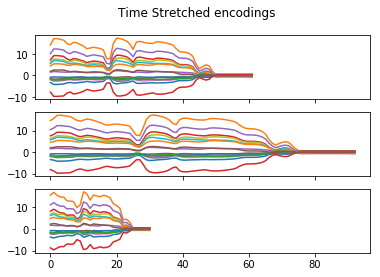

In [12]:
encoding_slow = timestretch(encodings,1.5)
encoding_fast = timestretch(encodings,0.5)

encoding_list.extend(encoding_slow_i for encoding_slow_i in encoding_slow)
encoding_name_list.append(fname + '_slow.wav')
encoding_list.extend(encoding_fast_i for encoding_fast_i in encoding_fast)
encoding_name_list.append(fname + '_fast.wav')

# Print the time stretched encodings
f,(ax1,ax2,ax3) = plt.subplots(3,1,sharex = True)
ax1.plot(encodings[0]);
ax2.plot(encoding_slow[0]);
ax3.plot(encoding_fast[0]);
f.suptitle('Time Stretched encodings');

#### 2) Reversing in time

In [13]:
def reverse_time(encodings):
    reverses = []
    for encoding_i in encodings:
        reverse_i = encoding_i[::-1]
        reverses.append(reverse_i)
    return np.array(reverses)

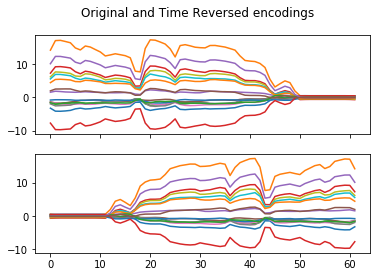

In [14]:
encoding_rev = reverse_time(encodings)
encoding_list.extend(encoding_rev_i for encoding_rev_i in encoding_rev)
encoding_name_list.append(fname + '_reversed.wav')

# Print the time reversed enocodings
f,(ax1,ax2) = plt.subplots(2,1,sharex = True)
ax1.plot(encodings[0]);
ax2.plot(encoding_rev[0]);
f.suptitle('Original and Time Reversed encodings');

#### 3) Reversing Magnitude (Flipping signs)

In [15]:
def scale_magnitude(encodings, factor):
    scaled = []
    for encoding_i in encodings:
        scaled_i = factor * encoding_i
        scaled.append(scaled_i)
    return np.array(scaled)

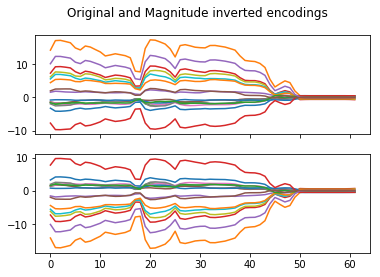

In [16]:
encoding_flipped = scale_magnitude(encodings, -1)
encoding_list.extend(encoding_flipped_i for encoding_flipped_i in encoding_flipped)
encoding_name_list.append(fname + '_flipped.wav')

# Print the magnitude inverted enocodings
f,(ax1,ax2) = plt.subplots(2,1,sharex = True)
ax1.plot(encodings[0]);
ax2.plot(encoding_flipped[0]);
f.suptitle('Original and Magnitude inverted encodings');

#### 4) Scaling magnitudes of Encoding
Scaling the magnitudes of the encoding by half and 1.5 times

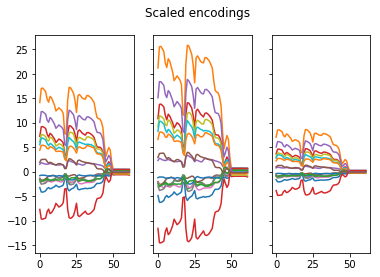

In [17]:
encoding_scaleup = scale_magnitude(encodings,1.5)
encoding_scaledown = scale_magnitude(encodings,0.5)

encoding_list.extend(encoding_scaleup_i for encoding_scaleup_i in encoding_scaleup)
encoding_name_list.append(fname + '_scaleup.wav')
encoding_list.extend(encoding_scaledown_i for encoding_scaledown_i in encoding_scaledown)
encoding_name_list.append(fname + '_scaledown.wav')

# Print the scaled encodings
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey = True)
ax1.plot(encodings[0]);
ax2.plot(encoding_scaleup[0]);
ax3.plot(encoding_scaledown[0]);
f.suptitle('Scaled encodings');

**NOTE** :The fastgen.synthesize function needs a numpy array of encodings with the dimensions as follows  
> [batch size **x** length of encoding **x** no of channels] 
  
So we format the encoding_list accordingly by padding with zeros to make all encodings of equal size to fit in a numpy array for batch processing

In [18]:
encoding_path_list = [os.path.join(output_path,encode_i) for encode_i in encoding_name_list]
encodings_array = np.array(encoding_list)

# Padding zeros while creating a batch of the encodings in a numpy array
max_len = max([encodings_array[i].shape[0] for i in range(len(encoding_list))])
e = np.zeros(shape = (len(encoding_list),max_len, 16))

for i in range(len(encoding_list)):
    e[i][:len(encoding_list[i])][:] = encoding_list[i]
print(e.shape)

(7, 93, 16)


> Its **Synthesis time again**. Put on your patience hat. (4 minutes per each second of batch audio on my NVIDIA GTX 1060 GPU)

In [ ]:

#fastgen.synthesize(e,
                   save_paths=encoding_path_list,
                   checkpoint_path=ckpt_path,
                   samples_per_save=int(SAMPLE_LENGTH / 10))
                   

## Manipulations : each channel individually
In this section, I create manipulations on individual channels of the encoding.

In [19]:
encoding_list = [encodings_i for encodings_i in encodings]
encoding_name_list = [get_name(fname) + '.wav' for fname in encoding_path_list]
fname = encoding_name_list[0]
print(fname, '\n is the file being manipulated.')

243851__zuluonedrop__dm-150-f-sax-riff.wav 
 is the file being manipulated.


[-3.266113   14.146133   -1.5628583   7.241577    1.518624   -1.3562337
 -1.5161688  -1.9735658   6.141057    5.517947   -0.82159173  4.3977113
 -1.6215134  -7.7387676  10.079988    1.937848  ]


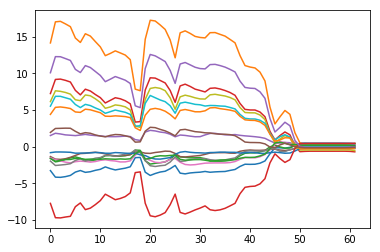

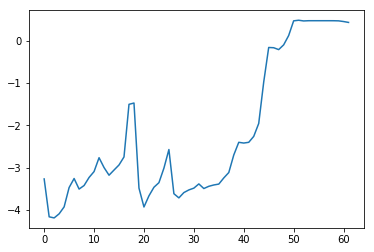

In [20]:
# Picking out 1 channel from the encoding

z_list = [z_ for z_ in z]
plt.plot(z_list[0])
a = np.array(z_list[0])
plt.figure()
b = [a[i][0] for i in range(62)]
plt.plot(b)

c = z_list[0][0]
print(c)